In [72]:
import classes as cl
import numpy as np
import matplotlib.pyplot as plt
import random 

In [73]:
n2 = cl.Node(1,2,10,[1,2,3,4],[])

print(n2.get_position())

(1, 2)


In [74]:
n = 10   # height of grid
m = 10   # width of grid
e = 5    # number of existing PHCs
p = 30   # number of possible PHCs

# Generate all possible pairs (i, j)
pairs = {(i, j) for i in range(1, n + 1) for j in range(1, m + 1)}

# Choose e random elements as existing PHCs
random_EPHCs = random.sample(list(pairs), e)
existing = set(random_EPHCs)

# Calculate remaining possible PHCs
remaining_elements = pairs - existing

# Choose p random elements as possible PHCs
random_PPHCs = random.sample(list(remaining_elements), p)
possible = set(random_PPHCs)

# Print the existing PHCs and possible PHCs
print("Existing PHCs:", existing)
print("Possible PHCs:", possible)


Existing PHCs: {(7, 4), (5, 4), (4, 8), (3, 6), (8, 2)}
Possible PHCs: {(3, 1), (5, 7), (9, 5), (5, 10), (10, 3), (2, 2), (2, 5), (6, 2), (7, 10), (6, 8), (4, 2), (4, 5), (3, 9), (9, 1), (9, 7), (8, 8), (2, 7), (7, 3), (7, 6), (4, 4), (4, 10), (5, 5), (8, 1), (10, 1), (10, 7), (1, 7), (6, 6), (7, 5), (6, 3), (6, 9)}


In [75]:
grid = {}  # initialize a dictionary for grid
V_blocks = {}  # set of vertices correspoding to blocks 
V_EPHC = {}  # set of vertices corresponding to existing PHCs
V_PPHC = {}  # set of vertices corresponding to possible PHCs

"Should we convert the dictionaries to sets?"

# Columns of a node are ID, posX, posY, population (int, 10-50), travel_time, neighbors (set), EPHC (int, 0-1), PPHC

for i in range(n):
    for j in range(m):
        noise_x = np.random.normal(0,0.1)
        noise_y = np.random.normal(0,0.1)
        rand_pos_x = i + noise_x
        rand_pos_y = j + noise_y
        id = (i,j)
        Pop =  random.randrange(10,50)
        # time = define travel_time column somehow. It will be a list of travel times to all PHCs.
        
        neighbors = set()
        if i == 0 or i == n - 1 or j == 0 or j == m - 1:   # corners
            if i != 0:
                neighbors.add((i - 1,j))  # top neighbor
            if j != m - 1:
                neighbors.add((i,j + 1))  # right neighbor
            if i != n - 1:
                neighbors.add((i + 1,j))  # bottom neighbor
            if j != 0:
                neighbors.add((i,j - 1))  # left neighbor
        else:
            neighbors.add((i - 1,j), (i + 1,j), (i,j - 1), (i,j + 1))   # middle nodes
    
        if (i,j) in existing:
            EPHC = 1
        else: EPHC = 0 

        if (i,j) in possible:
            PPHC = 1
        else: PPHC = 0 

        node = cl.Node(id, rand_pos_x, rand_pos_y, Pop, [], neighbors, EPHC, PPHC) # Define position columns of nodes
        
        grid[(i,j)] = node
        if EPHC == 1:
            V_EPHC[(i,j)] = node  
        if PPHC == 1:
            V_PPHC = [(i,j)] = node
        

print(grid[(3,4)].get_position())     
print(V_PPHC)


TypeError: Node.__init__() takes 6 positional arguments but 9 were given

In [ ]:
# Append coordinates of nodes to plot
x = []
y = []

for i in range(10):
    for j in range(10):
        x_pos,y_pos = grid[(i,j)].get_position()
        x.append(x_pos)
        y.append(y_pos)

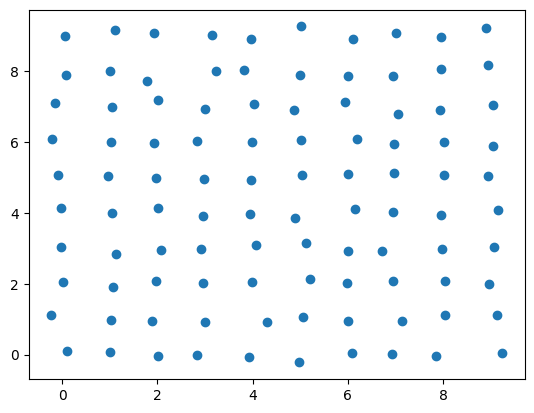

In [ ]:
plt.scatter(x,y)
plt.show()

In [78]:
# Columns of an edge: ID, type, line, tail, head, travel_time
E_blocks = {}  # initialize a dictionary for edges between blocks

for (i,j) in range(n,m):
    for (s,r) in range (n,m):
        ID = ((i,j),(s,r))
        "line = define this after adding a transportation network"
        "type = define this after adding a transportation network"
        tail = (i,j)    #Should I take this as a dictionary and connect to the node?
        head = (s,r)
        # travel_time = Do I need that?
        edge = cl.Edge(ID, [], [], tail, head, [])
        E_blocks[(i,j),(r,s)] = edge